In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy as sc
import anndata as ad
from Python_tools.ticci import ticci as ti
from sklearn.preprocessing import  PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Read Data

In [2]:
exprs_df = pd.read_csv('./output/HSMM/HSMM_norm_exprs.csv',index_col = 0)
exprs_df

,61E3.4,A1BG,A1BG-AS1,A2M,A2ML1-AS2,A4GALT,A-575C2.4,AAAS,AACS,AADAT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
T0_CT_A01,0.173037,0.046929,0.0,0.0,0.000000,0.0,0.000000,1.297520,0.000000,0.000000,...,0.475431,0.217728,0.000000,0.028612,0.014961,0.000000,0.006897,0.581692,0.052557,0.191107
T0_CT_A03,0.010708,0.222912,0.0,0.0,0.000000,0.0,0.000000,0.646405,0.000000,0.000000,...,0.370657,0.955661,0.000000,0.000000,0.000000,0.000000,0.112464,0.503273,0.156649,0.621581
T0_CT_A05,0.093216,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.635882,0.000000,0.087032,...,0.887631,1.600938,0.000000,0.187047,0.000000,0.000000,0.038248,1.721350,0.000000,0.826176
T0_CT_A06,0.000000,0.570093,0.0,0.0,0.000000,0.0,0.000000,0.427139,0.000000,0.000000,...,0.156394,0.000000,0.000000,0.000000,0.017787,0.000000,0.024561,2.099426,0.001748,1.277072
T0_CT_A07,0.589467,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.222357,0.128745,0.790819,...,0.122913,1.516169,0.000000,0.000000,0.000000,0.000000,0.040659,1.297243,0.054412,0.370312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T72_CT_H08,0.053173,0.353014,0.0,0.0,0.302807,0.0,0.000000,1.215597,0.016068,0.000000,...,1.118257,1.861931,0.000000,0.000000,0.000000,0.000000,0.003561,0.599892,0.019391,0.000000
T72_CT_H09,0.217293,0.000000,0.0,0.0,0.461100,0.0,0.000000,1.064858,0.088759,0.000000,...,1.140709,1.502945,0.000000,0.000000,0.000000,0.005543,0.109366,0.305509,0.045690,0.278394
T72_CT_H10,0.074072,0.855640,0.0,0.0,0.369736,0.0,0.000000,0.234350,0.007269,0.000000,...,0.059806,0.068111,0.000000,0.000000,0.218382,0.000000,0.596770,1.521488,0.027350,0.000000
T72_CT_H11,0.119533,0.620709,0.0,0.0,0.582417,0.0,0.007522,0.000000,0.000000,0.000000,...,0.006563,0.008264,0.376621,0.000000,0.000000,0.002209,0.556611,0.772116,0.023186,1.335233


In [3]:
meta_df = pd.read_csv('./output/HSMM/HSMM_meta.csv',index_col = 0)
meta_df

,Classification,state,entropy
T0_CT_A01,3,Proliferating cells,2.655603
T0_CT_A03,3,Proliferating cells,2.644017
T0_CT_A05,3,Proliferating cells,2.654561
T0_CT_A06,3,Proliferating cells,2.646047
T0_CT_A07,3,Proliferating cells,2.637765
...,...,...,...
T72_CT_H08,3,Proliferating cells,2.630558
T72_CT_H09,3,Proliferating cells,2.658875
T72_CT_H10,4,Differentiating myoblasts,2.639879
T72_CT_H11,4,Differentiating myoblasts,2.630526


In [4]:
adata = ad.AnnData(exprs_df)
adata

D:\ProgramData\anaconda3\envs\cci\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  """Entry point for launching an IPython kernel.


AnnData object with n_obs × n_vars = 266 × 15831

In [5]:
adata.obs['state'] = meta_df['state']
adata.obs['entropy'] = meta_df['entropy']
adata

AnnData object with n_obs × n_vars = 266 × 15831
    obs: 'state', 'entropy'

In [6]:
# Save Data
# adata.write('./output/HSMM/HSMM.h5ad')

# Dimensionality Reduction and Neiborhood Graph

In [7]:
adata = sc.read('./output/HSMM/HSMM.h5ad')
adata

AnnData object with n_obs × n_vars = 266 × 15831
    obs: 'state', 'entropy'

In [8]:
adata.to_df()

,61E3.4,A1BG,A1BG-AS1,A2M,A2ML1-AS2,A4GALT,A-575C2.4,AAAS,AACS,AADAT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
T0_CT_A01,0.173037,0.046929,0.0,0.0,0.000000,0.0,0.000000,1.297520,0.000000,0.000000,...,0.475431,0.217728,0.000000,0.028612,0.014961,0.000000,0.006897,0.581692,0.052557,0.191107
T0_CT_A03,0.010708,0.222912,0.0,0.0,0.000000,0.0,0.000000,0.646405,0.000000,0.000000,...,0.370657,0.955661,0.000000,0.000000,0.000000,0.000000,0.112464,0.503273,0.156649,0.621581
T0_CT_A05,0.093216,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.635882,0.000000,0.087032,...,0.887631,1.600938,0.000000,0.187047,0.000000,0.000000,0.038248,1.721350,0.000000,0.826176
T0_CT_A06,0.000000,0.570093,0.0,0.0,0.000000,0.0,0.000000,0.427139,0.000000,0.000000,...,0.156394,0.000000,0.000000,0.000000,0.017787,0.000000,0.024561,2.099426,0.001748,1.277072
T0_CT_A07,0.589467,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.222357,0.128745,0.790819,...,0.122913,1.516168,0.000000,0.000000,0.000000,0.000000,0.040659,1.297243,0.054412,0.370312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T72_CT_H08,0.053173,0.353014,0.0,0.0,0.302807,0.0,0.000000,1.215597,0.016068,0.000000,...,1.118257,1.861931,0.000000,0.000000,0.000000,0.000000,0.003561,0.599891,0.019391,0.000000
T72_CT_H09,0.217293,0.000000,0.0,0.0,0.461100,0.0,0.000000,1.064857,0.088759,0.000000,...,1.140709,1.502945,0.000000,0.000000,0.000000,0.005543,0.109366,0.305509,0.045690,0.278394
T72_CT_H10,0.074072,0.855640,0.0,0.0,0.369736,0.0,0.000000,0.234350,0.007269,0.000000,...,0.059806,0.068111,0.000000,0.000000,0.218382,0.000000,0.596770,1.521488,0.027350,0.000000
T72_CT_H11,0.119533,0.620709,0.0,0.0,0.582417,0.0,0.007522,0.000000,0.000000,0.000000,...,0.006563,0.008264,0.376621,0.000000,0.000000,0.002209,0.556611,0.772116,0.023186,1.335233


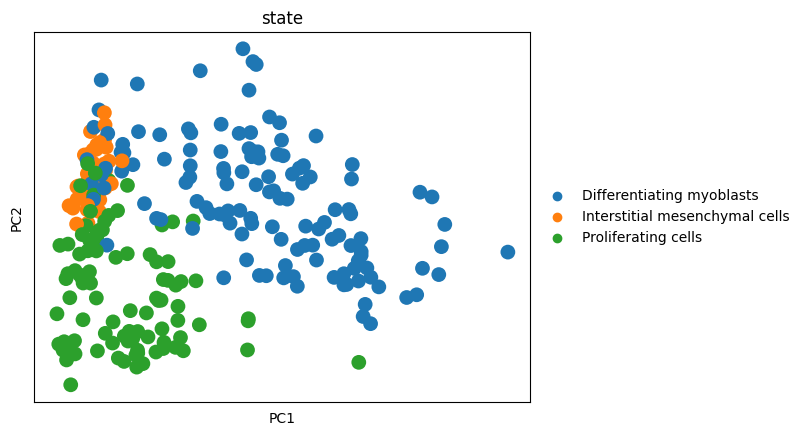

In [9]:
# PCA Dimensionality Reduction 
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='state')

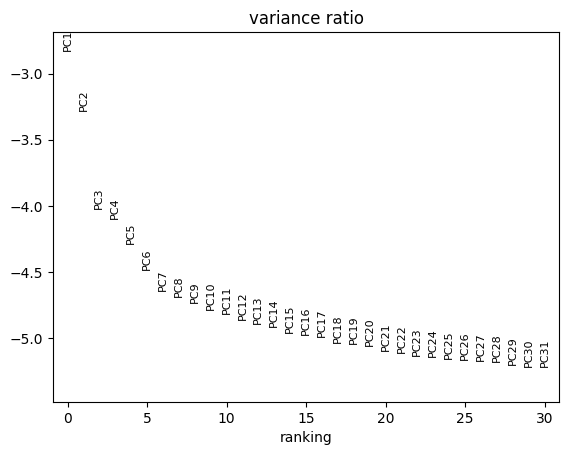

AnnData object with n_obs × n_vars = 266 × 15831
    obs: 'state', 'entropy'
    uns: 'pca', 'state_colors'
    obsm: 'X_pca'
    varm: 'PCs'

In [10]:
sc.pl.pca_variance_ratio(adata, log=True)
adata

In [11]:
# Calculate neighborhood graph
sc.pp.neighbors(adata, n_neighbors= 10, n_pcs=50)
adata

AnnData object with n_obs × n_vars = 266 × 15831
    obs: 'state', 'entropy'
    uns: 'pca', 'state_colors', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

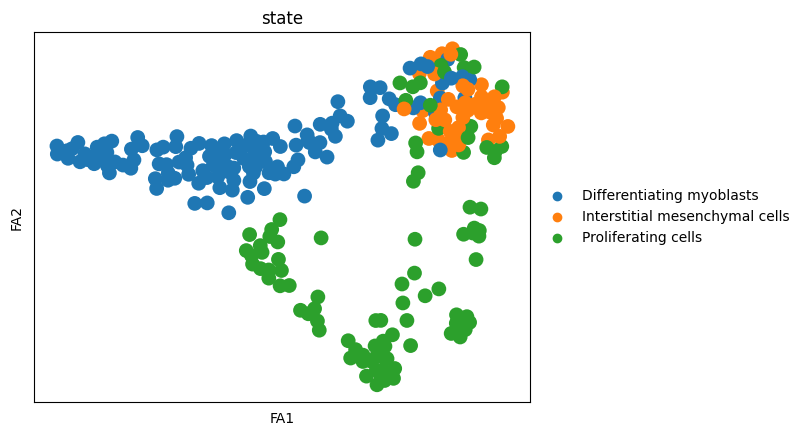

In [12]:
sc.tl.draw_graph(adata)
sc.pl.draw_graph(adata, color='state', legend_loc='right margin')

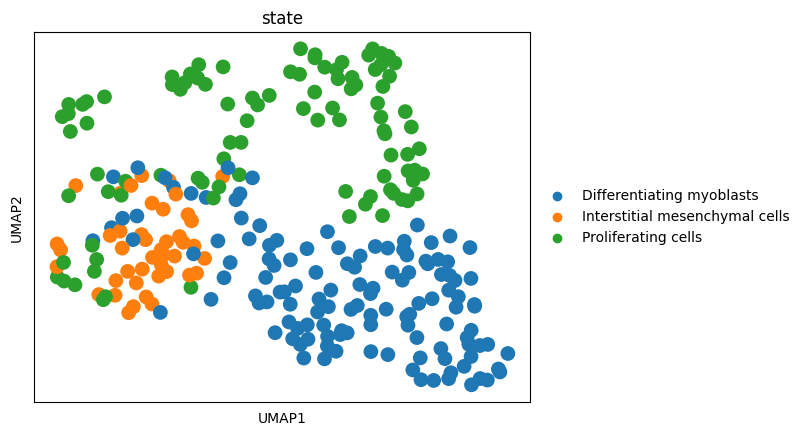

In [13]:
# UMAP dimensionality reduction
sc.tl.umap(adata)
sc.pl.umap(adata, color='state', legend_loc='right margin')

# ADD CCI

In [14]:
cci_df = pd.read_csv('./output/HSMM/HSMM_cci.csv',index_col = 0)
cci_df

,sender_cells,receiver_cells,ligand,receptor,prob
1,T0_CT_H01,T48_CT_H06,TGFB2,TGFBR1_TGFBR2,0.004212
2,T24_CT_B01,T48_CT_H06,TGFB2,TGFBR1_TGFBR2,0.004212
3,T24_CT_F11,T48_CT_H06,TGFB2,TGFBR1_TGFBR2,0.004212
4,T24_CT_H07,T48_CT_H06,TGFB2,TGFBR1_TGFBR2,0.004212
5,T48_CT_C10,T48_CT_H06,TGFB2,TGFBR1_TGFBR2,0.004212
...,...,...,...,...,...
270676,T0_CT_H01,T48_CT_F09,VCAM1,ITGA4_ITGB1,0.002456
270677,T24_CT_F03,T48_CT_F09,VCAM1,ITGA4_ITGB1,0.002456
270678,T24_CT_F07,T48_CT_F09,VCAM1,ITGA4_ITGB1,0.002456
270679,T48_CT_D10,T48_CT_F09,VCAM1,ITGA4_ITGB1,0.002456


In [15]:
# cci_k = 4.9
cci_k = 5.4
ti.addCCI(adata, cci_df, cci_k)

倍数： 5.4
10000 / 270680
20000 / 270680
30000 / 270680
40000 / 270680
50000 / 270680
60000 / 270680
70000 / 270680
80000 / 270680
90000 / 270680
100000 / 270680
110000 / 270680
120000 / 270680
130000 / 270680
140000 / 270680
150000 / 270680
160000 / 270680
170000 / 270680
180000 / 270680
190000 / 270680
200000 / 270680
210000 / 270680
220000 / 270680
230000 / 270680
240000 / 270680
250000 / 270680
260000 / 270680
270000 / 270680


# PAGA

In [16]:
sc.tl.louvain(adata,use_weights = True, resolution = 1.4)

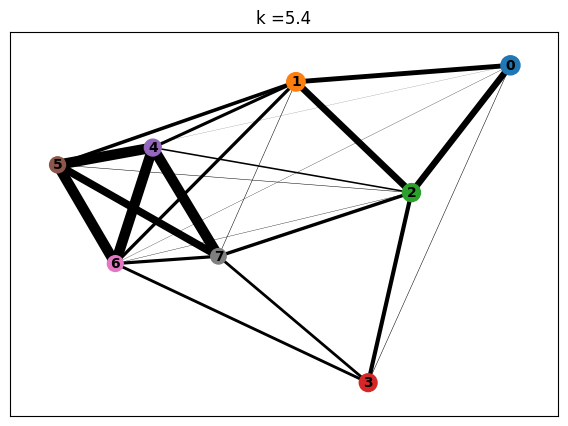

In [17]:
sc.tl.paga(adata, groups='louvain')
paga_filepath = '_HSMM_k = '+ str(cci_k)+ '.svg'
sc.pl.paga(adata, color=['louvain'],title = 'k =' + str(cci_k), save = paga_filepath)

In [18]:
adata

AnnData object with n_obs × n_vars = 266 × 15831
    obs: 'state', 'entropy', 'louvain'
    uns: 'pca', 'state_colors', 'neighbors', 'draw_graph', 'umap', 'louvain', 'paga', 'louvain_sizes', 'louvain_colors'
    obsm: 'X_pca', 'X_draw_graph_fa', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

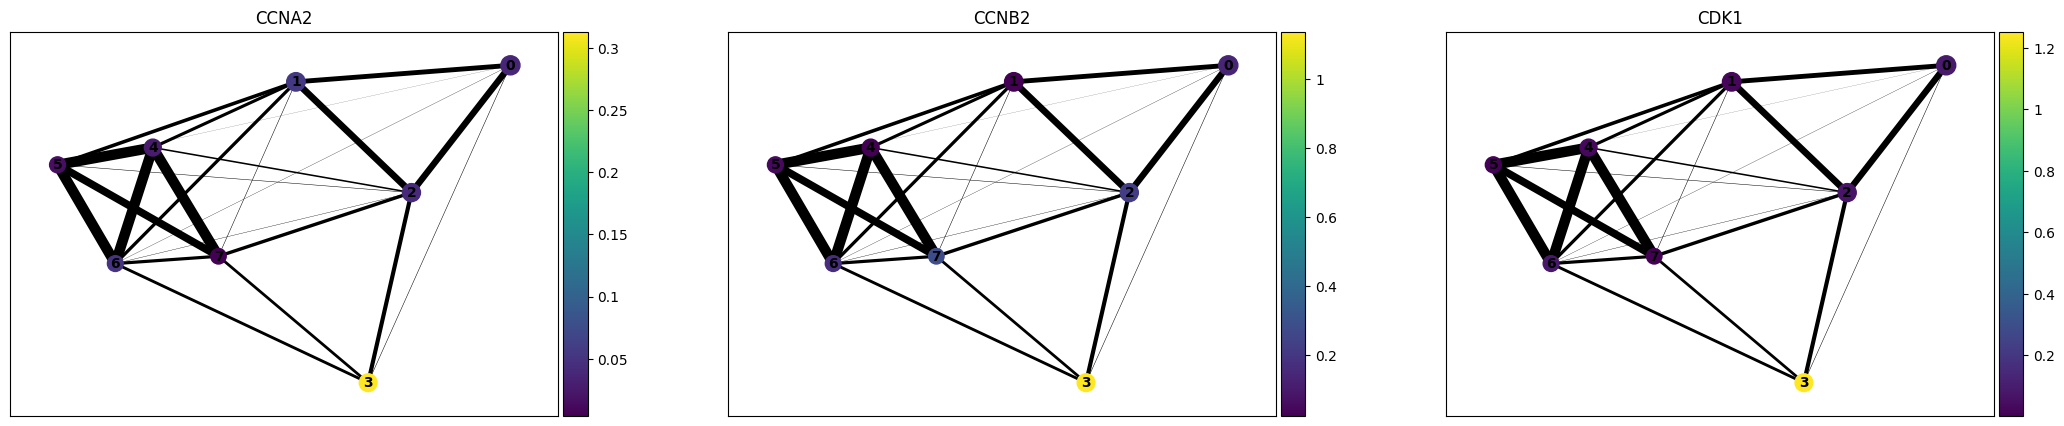

In [19]:
sc.pl.paga(adata, color=['CCNA2','CCNB2','CDK1'])

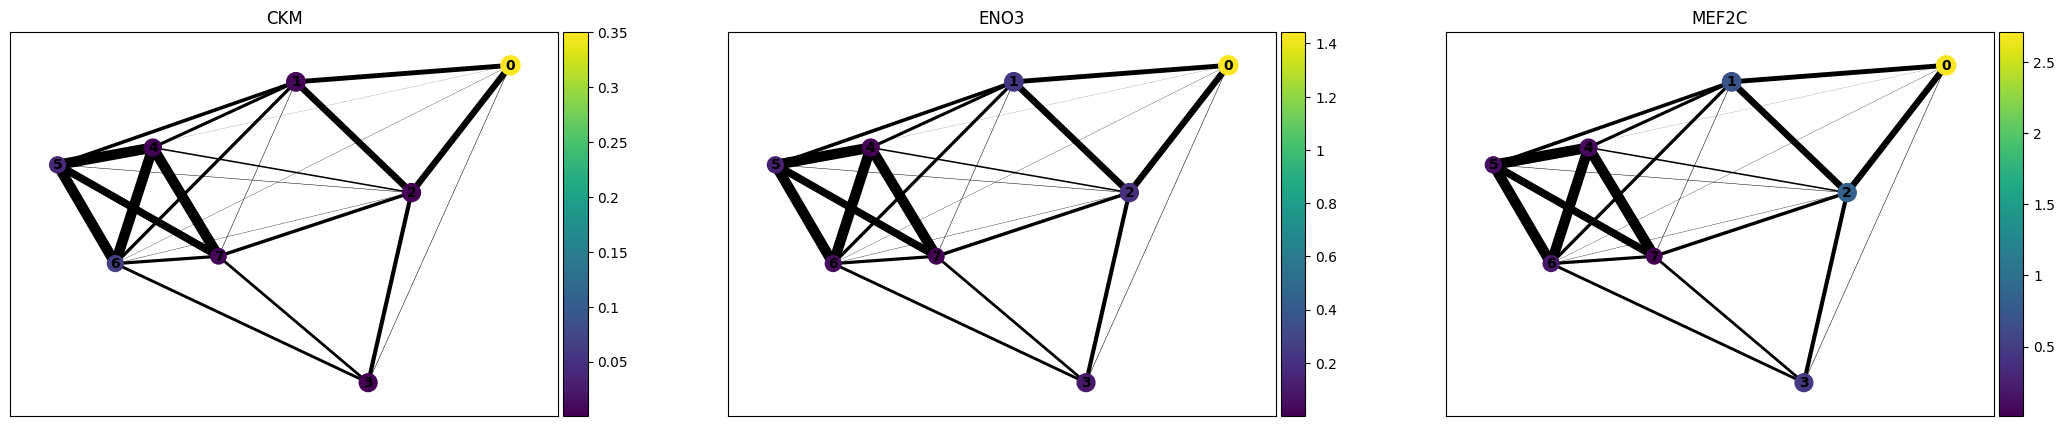

In [20]:
sc.pl.paga(adata, color=['CKM','ENO3','MEF2C'])

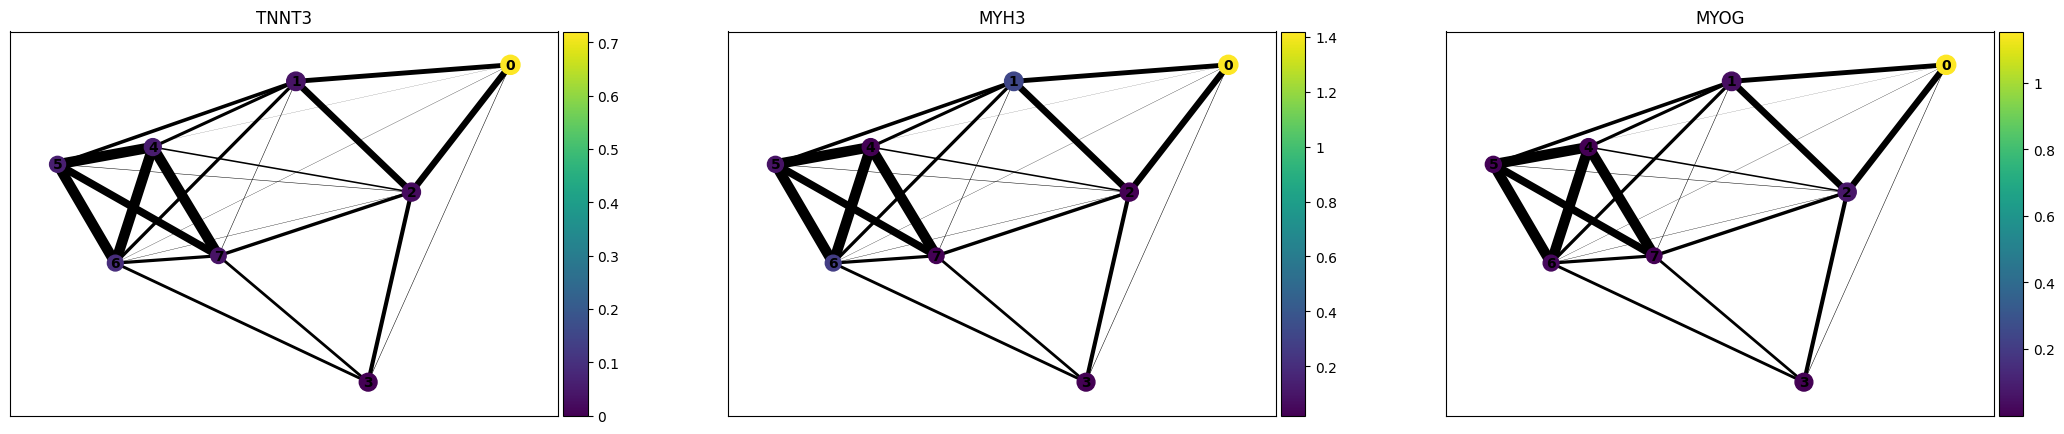

In [21]:
sc.pl.paga(adata, color=['TNNT3','MYH3','MYOG'])

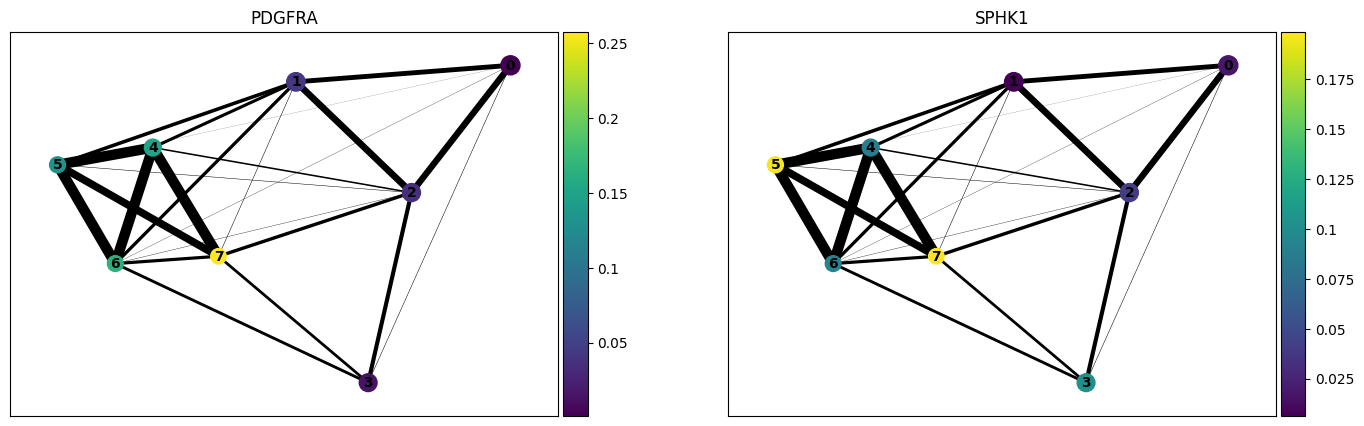

In [22]:
# Differentiation failure
sc.pl.paga(adata, color=['PDGFRA','SPHK1'])

# View Directed Graph

D:\生物信息\傅一峰数据代码\终极总结\HSMM\Python_tools\ticci.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['stable_entropy'][adata.obs['louvain']== i] = pagaSCE[i]


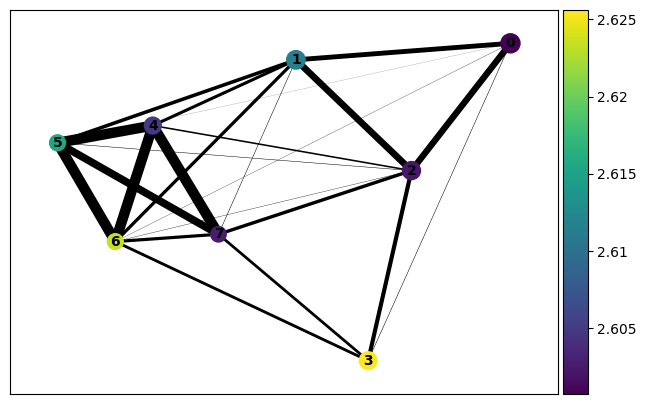

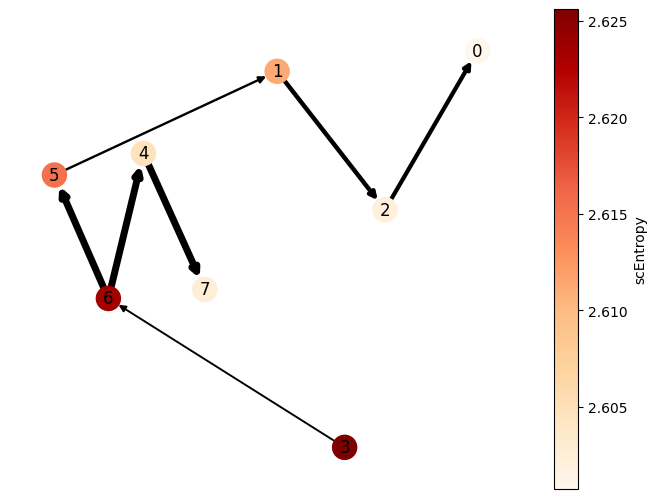

In [23]:
stable_entropy_filepath = '_HSMM_k = '+ str(cci_k)+ '_stable_entropy.svg'
lineage_filepath = './figures/HSMM/lineage.svg'
ti.getLineage(adata, stable_entropy_filepath, lineage_filepath)

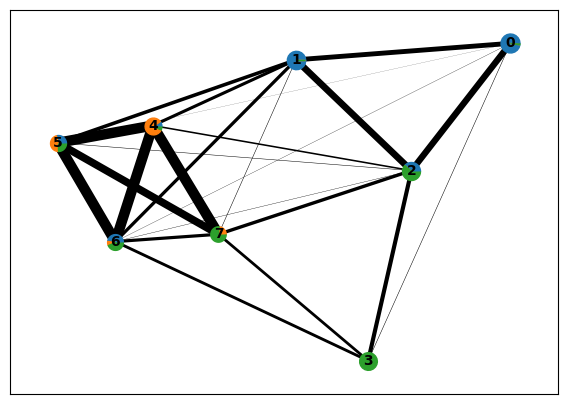

In [24]:
sc.pl.paga(adata, color=['state'])

In [25]:
# Find the Starting Point
max_louvain = np.argmax(adata.uns['louvain_entropy'])
root = np.flatnonzero(adata.to_df().index == (adata.obs['entropy'][adata.obs['louvain']  == str(max_louvain)]).sort_values(ascending = False).index[0])[0]
adata.uns['iroot'] = root 
adata.uns['iroot']

55

In [26]:
# Calculate the Pseudo Time Value
sc.tl.dpt(adata)

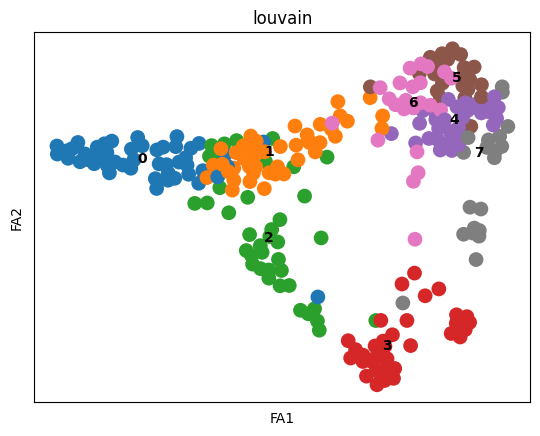

In [27]:
sc.pl.draw_graph(adata, color=['louvain'], legend_loc='on data',save='HSMM_louvain.svg')

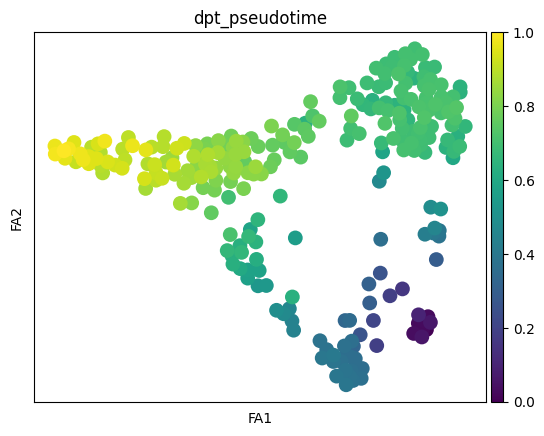

In [28]:
sc.pl.draw_graph(adata, color=['dpt_pseudotime'], legend_loc='on data',save='HSMM_pseudotime.svg')

# Pseudotime Accuracy Score

In [29]:
# Check Pseudo Time Value
psedotime = adata.obs['dpt_pseudotime']
psedotime.to_frame()

,dpt_pseudotime
T0_CT_A01,0.574784
T0_CT_A03,0.357498
T0_CT_A05,0.384166
T0_CT_A06,0.534152
T0_CT_A07,0.381639
...,...
T72_CT_H08,0.258943
T72_CT_H09,0.344526
T72_CT_H10,0.829094
T72_CT_H11,0.846887


In [30]:
# Determine by Cell Labels
correct = 0
wrong = 0
undefined = 0
for i in range(0,len(psedotime)):
    for j in range(i+1,len(psedotime)):
#         print(test.index[i],test.index[j])
        i_state = -1
        i_dpt_pseudotime = adata.obs['dpt_pseudotime'][i]
        j_state = -1
        j_dpt_pseudotime = adata.obs['dpt_pseudotime'][j]

        if(adata.obs['state'][i] == 'Proliferating cells'):
            i_state = 0
        else:
            i_state = 1
        if(adata.obs['state'][j] == 'Proliferating cells'):
            j_state = 0
        else:
            j_state = 1
        
#         print(i_state,i_dpt_pseudotime,j_state,j_dpt_pseudotime)
        if(i_state == j_state):
            undefined += 1
        elif( (i_state > j_state) == (i_dpt_pseudotime > j_dpt_pseudotime) ):
            correct += 1
        else:
            wrong += 1

score = (correct - wrong)/(correct+wrong+undefined)
print(correct,wrong,undefined)
print("PMS",score)

15933 387 18925
PMS 0.44108384167967085


In [31]:
# Save Results
# adata.write('./output/HSMM/HSMM_finished.h5ad')

# View gene markers for branches

In [32]:
# View gene markers for branches 3→6→5→1→2→0
test = adata[(adata.obs['louvain']=='3') |(adata.obs['louvain']=='6')|(adata.obs['louvain']=='5')|(adata.obs['louvain']=='1')|(adata.obs['louvain']=='2')|(adata.obs['louvain']=='0')].obs['dpt_pseudotime']
test

T0_CT_A01     0.574784
T0_CT_A03     0.357498
T0_CT_A05     0.384166
T0_CT_A06     0.534152
T0_CT_A07     0.381639
                ...   
T72_CT_H08    0.258943
T72_CT_H09    0.344526
T72_CT_H10    0.829094
T72_CT_H11    0.846887
T72_CT_H12    0.685128
Name: dpt_pseudotime, Length: 215, dtype: float32

In [33]:
order = test.to_frame().sort_values(by=['dpt_pseudotime'],ascending=True)
orderadata = adata.to_df().reindex(order.index)

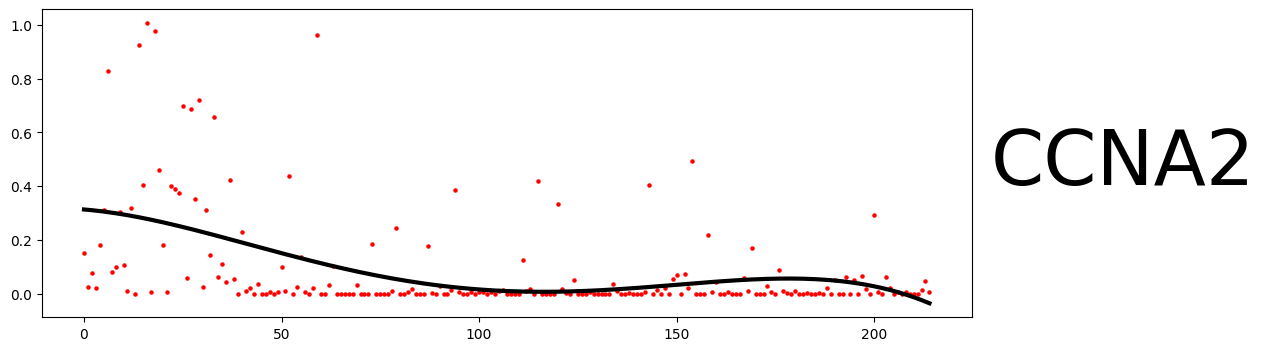

In [34]:
gene = 'CCNA2'

# x = np.array(order['dpt_pseudotime'].values)
x = range(0, len(orderadata))
y = np.array(orderadata[gene].values)
x = np.reshape(x, (-1, 1))

# Start fitting, where `degree` represents the highest degree of the polynomial
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Set the size of the plot, aspect ratio 3:1
pl.figure(figsize=(12, 4))

# Predictions; note that `x` needs to be transformed using `fit_transform` before prediction
y_pred = lin_reg.predict(X_poly)

# Scatter plot of data points
pl.scatter(x, y, c="red", s=5)

# Plot the regression curve
pl.plot(x, y_pred, c='black', linewidth=3)

# Add gene name as title on the right side of the plot
pl.text(1.02, 0.5, gene, transform=pl.gca().transAxes, va='center', ha='left', fontsize=55)

# Save as SVG format
pl.savefig('./figures/HSMM/gene/' + gene + '.svg', format='svg', bbox_inches=None, transparent=True)
pl.show()

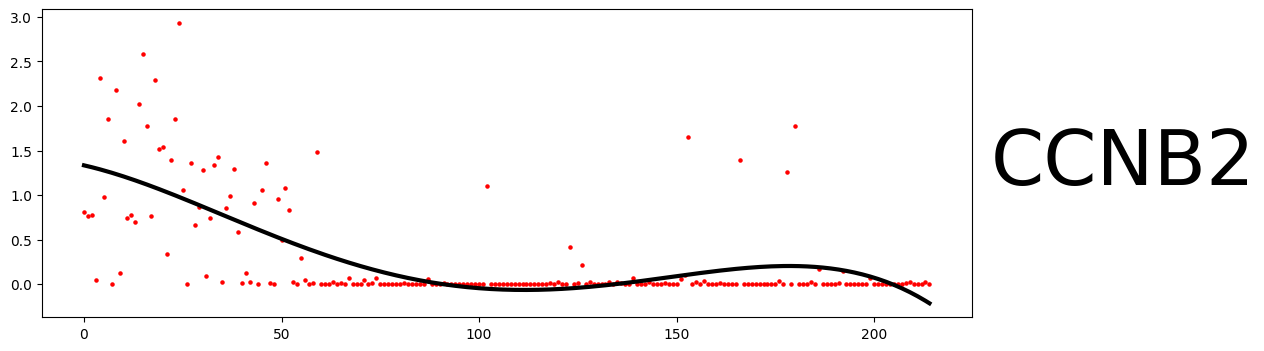

In [35]:
gene = 'CCNB2'

# x = np.array(order['dpt_pseudotime'].values)
x = range(0, len(orderadata))
y = np.array(orderadata[gene].values)
x = np.reshape(x, (-1, 1))

# Start fitting, where `degree` represents the highest degree of the polynomial
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Set the size of the plot, aspect ratio 3:1
pl.figure(figsize=(12, 4))

# Predictions; note that `x` needs to be transformed using `fit_transform` before prediction
y_pred = lin_reg.predict(X_poly)

# Scatter plot of data points
pl.scatter(x, y, c="red", s=5)

# Plot the regression curve
pl.plot(x, y_pred, c='black', linewidth=3)

# Add gene name as title on the right side of the plot
pl.text(1.02, 0.5, gene, transform=pl.gca().transAxes, va='center', ha='left', fontsize=55)

# Save as SVG format
pl.savefig('./figures/HSMM/gene/' + gene + '.svg', format='svg', bbox_inches=None, transparent=True)
pl.show()

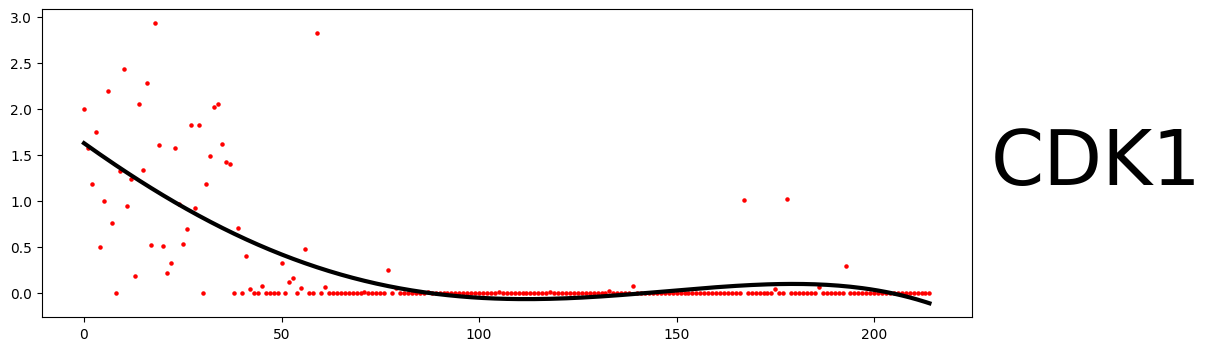

In [36]:
gene = 'CDK1'

# x = np.array(order['dpt_pseudotime'].values)
x = range(0, len(orderadata))
y = np.array(orderadata[gene].values)
x = np.reshape(x, (-1, 1))

# Start fitting, where `degree` represents the highest degree of the polynomial
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Set the size of the plot, aspect ratio 3:1
pl.figure(figsize=(12, 4))

# Predictions; note that `x` needs to be transformed using `fit_transform` before prediction
y_pred = lin_reg.predict(X_poly)

# Scatter plot of data points
pl.scatter(x, y, c="red", s=5)

# Plot the regression curve
pl.plot(x, y_pred, c='black', linewidth=3)

# Add gene name as title on the right side of the plot
pl.text(1.02, 0.5, gene, transform=pl.gca().transAxes, va='center', ha='left', fontsize=55)

# Save as SVG format
pl.savefig('./figures/HSMM/gene/' + gene + '.svg', format='svg', bbox_inches=None, transparent=True)
pl.show()

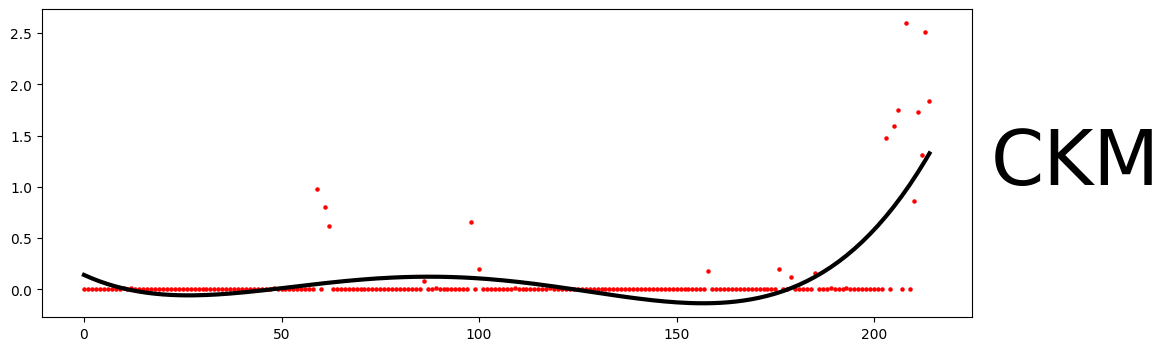

In [37]:
gene = 'CKM'

# x = np.array(order['dpt_pseudotime'].values)
x = range(0, len(orderadata))
y = np.array(orderadata[gene].values)
x = np.reshape(x, (-1, 1))

# Start fitting, where `degree` represents the highest degree of the polynomial
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Set the size of the plot, aspect ratio 3:1
pl.figure(figsize=(12, 4))

# Predictions; note that `x` needs to be transformed using `fit_transform` before prediction
y_pred = lin_reg.predict(X_poly)

# Scatter plot of data points
pl.scatter(x, y, c="red", s=5)

# Plot the regression curve
pl.plot(x, y_pred, c='black', linewidth=3)

# Add gene name as title on the right side of the plot
pl.text(1.02, 0.5, gene, transform=pl.gca().transAxes, va='center', ha='left', fontsize=55)

# Save as SVG format
pl.savefig('./figures/HSMM/gene/' + gene + '.svg', format='svg', bbox_inches=None, transparent=True)
pl.show()

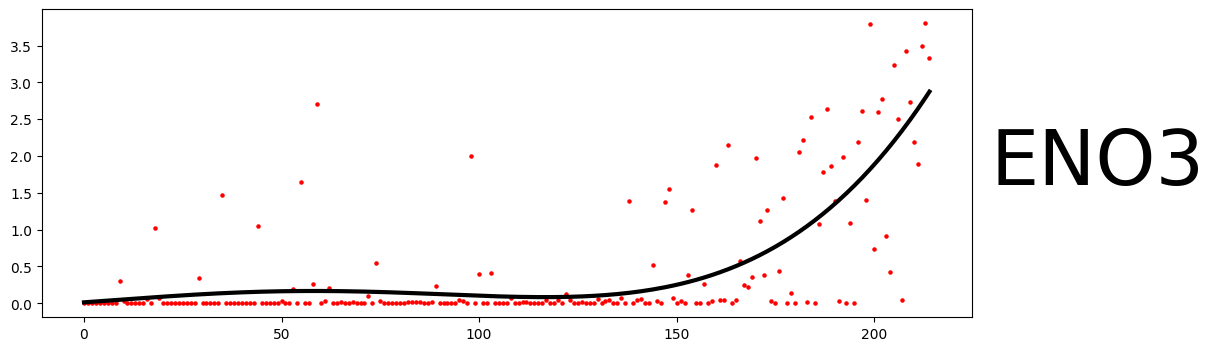

In [38]:
gene = 'ENO3'

# x = np.array(order['dpt_pseudotime'].values)
x = range(0, len(orderadata))
y = np.array(orderadata[gene].values)
x = np.reshape(x, (-1, 1))

# Start fitting, where `degree` represents the highest degree of the polynomial
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Set the size of the plot, aspect ratio 3:1
pl.figure(figsize=(12, 4))

# Predictions; note that `x` needs to be transformed using `fit_transform` before prediction
y_pred = lin_reg.predict(X_poly)

# Scatter plot of data points
pl.scatter(x, y, c="red", s=5)

# Plot the regression curve
pl.plot(x, y_pred, c='black', linewidth=3)

# Add gene name as title on the right side of the plot
pl.text(1.02, 0.5, gene, transform=pl.gca().transAxes, va='center', ha='left', fontsize=55)

# Save as SVG format
pl.savefig('./figures/HSMM/gene/' + gene + '.svg', format='svg', bbox_inches=None, transparent=True)
pl.show()

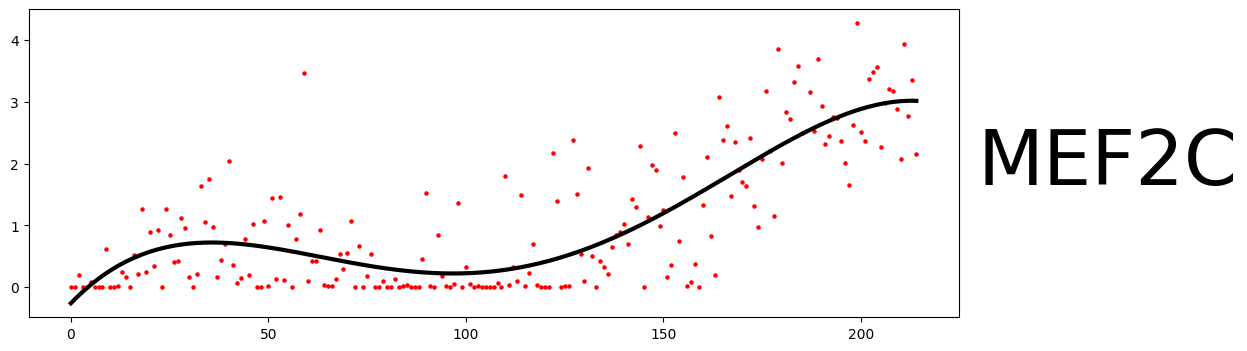

In [39]:
gene = 'MEF2C'

# x = np.array(order['dpt_pseudotime'].values)
x = range(0, len(orderadata))
y = np.array(orderadata[gene].values)
x = np.reshape(x, (-1, 1))

# Start fitting, where `degree` represents the highest degree of the polynomial
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Set the size of the plot, aspect ratio 3:1
pl.figure(figsize=(12, 4))

# Predictions; note that `x` needs to be transformed using `fit_transform` before prediction
y_pred = lin_reg.predict(X_poly)

# Scatter plot of data points
pl.scatter(x, y, c="red", s=5)

# Plot the regression curve
pl.plot(x, y_pred, c='black', linewidth=3)

# Add gene name as title on the right side of the plot
pl.text(1.02, 0.5, gene, transform=pl.gca().transAxes, va='center', ha='left', fontsize=55)

# Save as SVG format
pl.savefig('./figures/HSMM/gene/' + gene + '.svg', format='svg', bbox_inches=None, transparent=True)
pl.show()

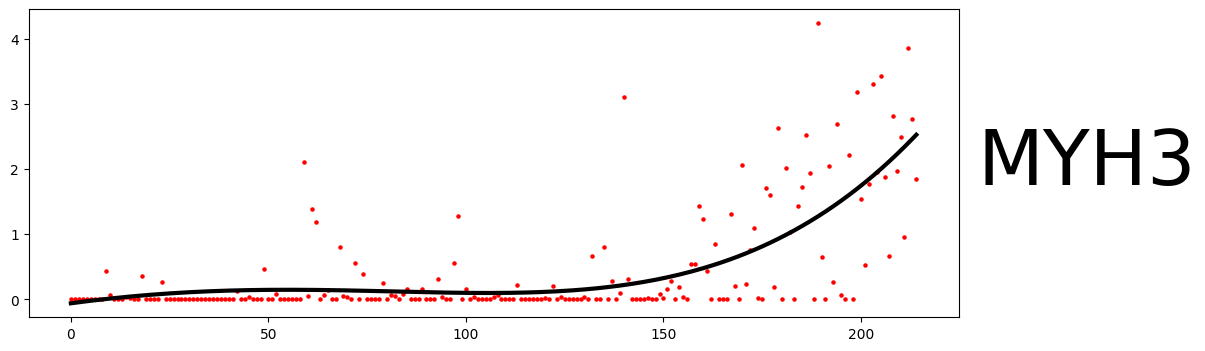

In [40]:
gene = 'MYH3'

# x = np.array(order['dpt_pseudotime'].values)
x = range(0, len(orderadata))
y = np.array(orderadata[gene].values)
x = np.reshape(x, (-1, 1))

# Start fitting, where `degree` represents the highest degree of the polynomial
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Set the size of the plot, aspect ratio 3:1
pl.figure(figsize=(12, 4))

# Predictions; note that `x` needs to be transformed using `fit_transform` before prediction
y_pred = lin_reg.predict(X_poly)

# Scatter plot of data points
pl.scatter(x, y, c="red", s=5)

# Plot the regression curve
pl.plot(x, y_pred, c='black', linewidth=3)

# Add gene name as title on the right side of the plot
pl.text(1.02, 0.5, gene, transform=pl.gca().transAxes, va='center', ha='left', fontsize=55)

# Save as SVG format
pl.savefig('./figures/HSMM/gene/' + gene + '.svg', format='svg', bbox_inches=None, transparent=True)
pl.show()

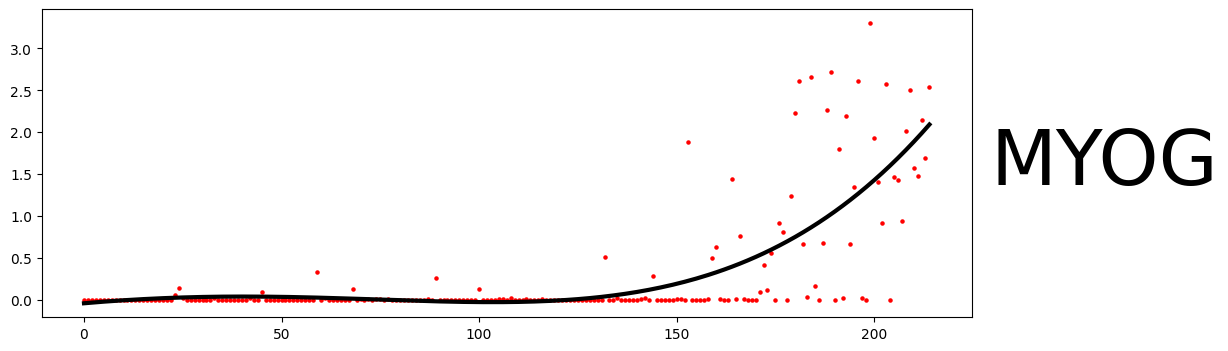

In [41]:
gene = 'MYOG'

# x = np.array(order['dpt_pseudotime'].values)
x = range(0, len(orderadata))
y = np.array(orderadata[gene].values)
x = np.reshape(x, (-1, 1))

# Start fitting, where `degree` represents the highest degree of the polynomial
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Set the size of the plot, aspect ratio 3:1
pl.figure(figsize=(12, 4))

# Predictions; note that `x` needs to be transformed using `fit_transform` before prediction
y_pred = lin_reg.predict(X_poly)

# Scatter plot of data points
pl.scatter(x, y, c="red", s=5)

# Plot the regression curve
pl.plot(x, y_pred, c='black', linewidth=3)

# Add gene name as title on the right side of the plot
pl.text(1.02, 0.5, gene, transform=pl.gca().transAxes, va='center', ha='left', fontsize=55)

# Save as SVG format
pl.savefig('./figures/HSMM/gene/' + gene + '.svg', format='svg', bbox_inches=None, transparent=True)
pl.show()

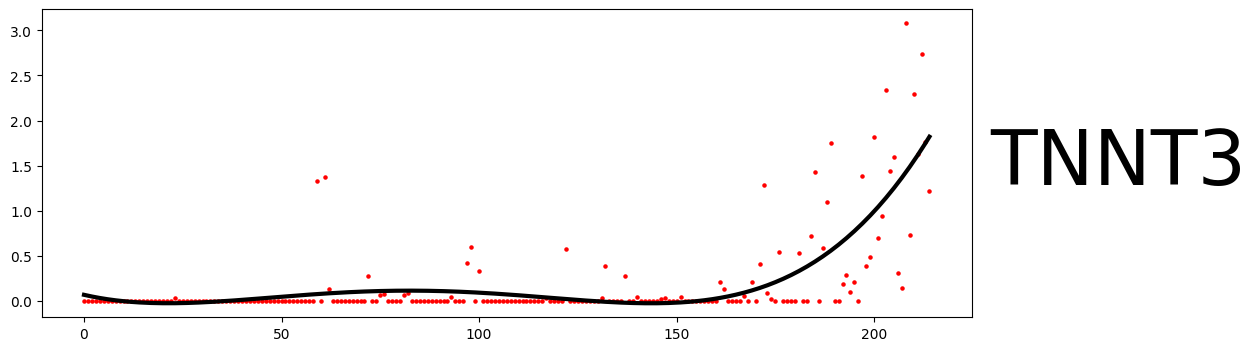

In [42]:
gene = 'TNNT3'

# x = np.array(order['dpt_pseudotime'].values)
x = range(0, len(orderadata))
y = np.array(orderadata[gene].values)
x = np.reshape(x, (-1, 1))

# Start fitting, where `degree` represents the highest degree of the polynomial
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Set the size of the plot, aspect ratio 3:1
pl.figure(figsize=(12, 4))

# Predictions; note that `x` needs to be transformed using `fit_transform` before prediction
y_pred = lin_reg.predict(X_poly)

# Scatter plot of data points
pl.scatter(x, y, c="red", s=5)

# Plot the regression curve
pl.plot(x, y_pred, c='black', linewidth=3)

# Add gene name as title on the right side of the plot
pl.text(1.02, 0.5, gene, transform=pl.gca().transAxes, va='center', ha='left', fontsize=55)

# Save as SVG format
pl.savefig('./figures/HSMM/gene/' + gene + '.svg', format='svg', bbox_inches=None, transparent=True)
pl.show()